<a href="https://colab.research.google.com/github/melan-variya/Handwritten-letter-prediction-from-scratch/blob/main/handwrittentodigital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import gzip
import os

In [2]:
# !unzip "/content/drive/MyDrive/emnist-byclass-train.csv.zip" -d "/content/drive/MyDrive/EMNIST/"

In [3]:
def load_images(path):
    with gzip.open(path, 'rb') as f:
        f.read(16)
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data.reshape(-1, 28, 28)

def load_labels(path):
    with gzip.open(path, 'rb') as f:
        f.read(8)
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


X_train =  load_images("/content/drive/MyDrive/EMNIST/emnist-byclass-train-images-idx3-ubyte.gz")

y_train = load_labels("/content/drive/MyDrive/EMNIST/emnist-byclass-train-labels-idx1-ubyte.gz")

In [4]:
print(X_train[:1])

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0  22  81 125  77   0   0   0   0]
  [  0   0   1  19   8   0   0   0   0   0   0   0   0   0   0   0   0
     0   0  20 159 232 249 206  10   0   0   0]
  [  0   0  34 201 207  90   1   0   0   0   0   0   0   0   0   0   0
     0  24 170 254 254 254 253 113   4   0   0]
  [  0   0  84 233 253 218  19   0   0   0   0   0   0   0   0   0   2
    11 131 234 254 255 255 254 127   4   0   0]
  [  0   2 170 251 254 233  20   0   0   0   0  

In [5]:
print(X_train.shape)

(697932, 28, 28)


In [6]:
print(y_train.shape)

(697932,)


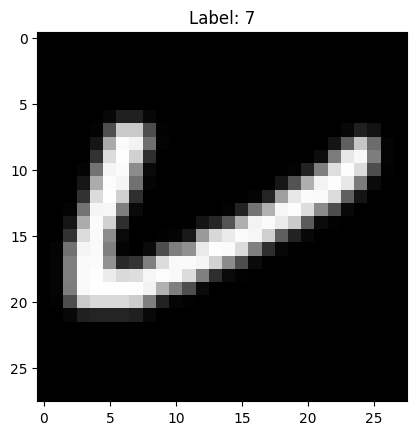

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1005], cmap='gray')
plt.title(f"Label: {y_train[1005]}")
plt.show()


In [8]:
X_train= np.transpose(X_train, (0, 2, 1))

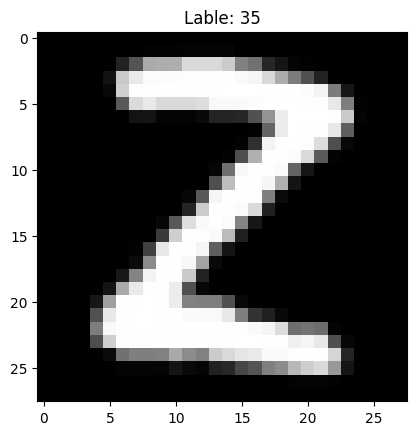

In [9]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Lable: {y_train[0]}")
plt.show()

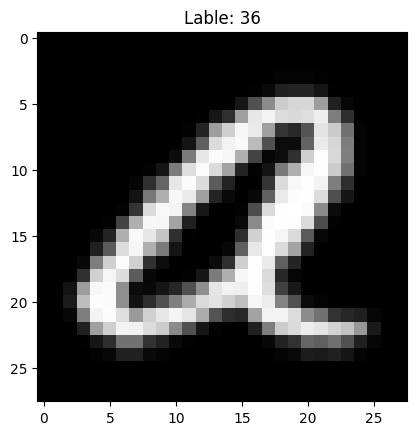

In [10]:
plt.imshow(X_train[1], cmap='gray')
plt.title(f"Lable: {(y_train[1])}")
plt.show()

In [11]:
X_train = X_train/255.0

In [12]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00784314 0.00784314 0.00784314 0.01568627
  0.01568627 0.01568627 0.01568627 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00392157
  0.13333333 0.32941176 0.66666667 0.67843137 0.68235294 0.85098039
  0.85098039 0.85098039 0.79607843 0.50588235 0.44705882 0.14901961
  0.08235294 0.01568627 0.00784314 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.0745098
  0.78823529 0.91372549 0.98431373 0.988

In [13]:
X_train = np.reshape(X_train,(len(X_train),-1))

In [14]:
print(X_train[1001:1010])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
num_classes = 62
y_onehot= np.zeros((len(X_train),num_classes))
y_onehot[np.arange(len(X_train)),y_train]=1

In [16]:
weights = np.random.randn(784,128)*0.01

print(weights)

biases = np.random.randn((128))

print(biases)

[[-0.00047868  0.01591972  0.00279187 ... -0.0108104   0.00445481
  -0.00421426]
 [-0.0033765   0.00774074 -0.02084088 ... -0.00234933 -0.00718122
   0.00455285]
 [-0.00138026 -0.00257558 -0.00388903 ...  0.00315017  0.01523183
   0.0029647 ]
 ...
 [ 0.00497265  0.00105944  0.0180035  ...  0.00133945 -0.00786715
   0.00458071]
 [-0.01753498  0.00064147  0.01656667 ...  0.00608797 -0.00341753
  -0.00305045]
 [ 0.00044149 -0.00196853  0.01123415 ...  0.01192455  0.00491238
  -0.0018488 ]]
[-0.25651139  0.47739634 -1.61304122 -0.16398196  0.296892    0.02545302
 -0.15996689  0.38795034  0.08295524 -1.45934258  1.33395628  0.46335076
  1.05893844 -0.99757877 -0.78629274 -0.78158903  0.22951142 -1.69076801
  0.38996201 -0.9953596   0.54068359  0.05593583  0.14249726  1.53200547
 -0.05506663  0.09873471  0.79681504 -1.18315941  0.73022041 -0.93924567
 -0.09439138  0.20058976 -0.94417933 -0.61572648  1.36064937 -0.01985156
 -0.0195239   1.63267589 -0.0702423   0.88271383 -1.48926277  0.083348

In [17]:
print(X_train.shape)
print(weights.shape)
layer1 = np.dot(X_train,weights) + biases
print(layer1)

(697932, 784)
(784, 128)
[[-0.21750811  0.45100895 -1.64610597 ... -0.9299323   0.67837961
  -1.56211403]
 [-0.28509535  0.33956741 -1.6283586  ... -1.07204293  0.50241427
  -1.59420296]
 [-0.32111785  0.26593556 -1.58350887 ... -0.99584295  0.64384607
  -1.62095277]
 ...
 [-0.34999848  0.40153964 -1.60772472 ... -1.02579163  0.60516565
  -1.43483843]
 [-0.14546023  0.42860454 -1.64759006 ... -1.03886353  0.62512917
  -1.51805368]
 [-0.130414    0.29785618 -1.66959714 ... -1.08891442  0.59324969
  -1.49680263]]


In [18]:
import math

class layer_dense:
  def __init__(self,n_inputs,n_nuerons):
    # self.weights = np.random.randn(n_inputs,n_nuerons)
    self.weights = np.random.randn(n_inputs, n_nuerons) * np.sqrt(2.0 / n_inputs)
    self.baises = np.zeros((1,n_nuerons))
  def forward(self,inputs):
    self.inputs = inputs
    self.output = np.dot(inputs,self.weights) + self.baises
  def backward(self, dvalues):
    # davlues is the gradient from the next layer
    # shape is like (m, n_neurons)
    m = self.inputs.shape[0]

    # (n_inputs, n_neurons)
    self.dweights = np.dot(self.inputs.T, dvalues) / m
    # (1, n_neurons)
    self.dbiases = np.sum(dvalues, axis=0, keepdims=True) / m
    # (m, n_inputs)
    self.dinputs = np.dot(dvalues, self.weights.T)


class Activation_ReLU:
  def forward(self, inputs):
    self.inputs= inputs
    self.output = np.maximum(0,inputs)
  def backward(self,dvalues):
    self.dinputs = dvalues.copy()
    self.dinputs[self.inputs <= 0 ]=0

class Activation_softmax:
  def forward(self,inputs):
    exp_values = np.exp(inputs - np.max( inputs, axis=1, keepdims=True))
    normal_values = exp_values / np.sum(exp_values , axis=1, keepdims=True)
    self.output = normal_values



# class Activation_Softmax_Loss_CategoricalCrossentropy:

#     def forward(self, inputs, y_true):
#         # Softmax
#         exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
#         probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

#         self.output = probabilities
#         self.y_true = y_true

#         # Cross-entropy loss
#         samples = len(inputs)
#         clipped = np.clip(probabilities, 1e-7, 1 - 1e-7)
#         correct_confidences = np.sum(clipped * y_true, axis=1)
#         loss = -np.log(correct_confidences)

#         return np.mean(loss)



class Loss_calculation:
  def forward_loss(self, y_pred, y_actual):
    self.output = np.sum(-(y_actual)*(np.log(np.clip(y_pred,1e-7,1-1e-7))),axis=1,keepdims=True)
    data_loss = np.mean(self.output)
    return data_loss
  def backward(self,y_pred,y_true):
    samples= len(y_pred)
    self.dinputs = (y_pred-y_true)/samples
#clip(num,0.001,0.999) mean if num<0.001 then make it 0.001 and if num>0.999 then make it 0.999

In [19]:
# learning_rate = 0.01
# epochs = 1000

# for epoch in range(epochs):

#     # ----- FORWARD -----
#     dense1.forward(X)
#     relu.forward(dense1.output)
#     dense2.forward(relu.output)
#     softmax.forward(dense2.output)

#     loss = loss_fn.forward_loss(softmax.output, y)

#     # ----- BACKWARD -----
#     loss_fn.backward(softmax.output, y)
#     dense2.backward(loss_fn.dinputs)
#     relu.backward(dense2.dinputs)
#     dense1.backward(relu.dinputs)

#     # ----- UPDATE WEIGHTS (THIS IS WHERE) -----
#     dense1.weights -= learning_rate * dense1.dweights
#     dense1.baises  -= learning_rate * dense1.dbiases

#     dense2.weights -= learning_rate * dense2.dweights
#     dense2.baises  -= learning_rate * dense2.dbiases

#     if epoch % 100 == 0:
#         print("epoch:", epoch, "loss:", loss)

In [20]:
print(X_train.shape)

(697932, 784)


In [21]:
layer1 = layer_dense(784,256)
layer2 = layer_dense(256,62)
# layer3 = layer_dense(128,62)


activation1 = Activation_ReLU()
# activation2 = Activation_ReLU()
activation2 = Activation_softmax()

allloss = Loss_calculation()

In [22]:
layer1.forward(X_train)
# layer1.output.shape()
# print(layer1.output)

activation1.forward(layer1.output)
# print("next")
print(activation1.output)

[[1.4379835  1.07197257 0.         ... 0.         0.         0.92320264]
 [0.42010351 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.33500095 ... 0.         0.         0.39522626]
 ...
 [0.32187632 0.         0.         ... 0.         0.04795992 0.01104014]
 [0.58571566 0.         0.         ... 0.         0.         0.70629417]
 [0.3790398  0.         0.         ... 0.         0.         0.21277726]]


In [23]:
layer2.forward(activation1.output)
# layer1.output.shape()
# print(layer1.output)

activation2.forward(layer2.output)
# print("next")
print(activation2.output)

[[0.0172303  0.01348107 0.01894091 ... 0.00728611 0.01142544 0.00927005]
 [0.01707159 0.00708016 0.02625344 ... 0.01459911 0.01024606 0.01674785]
 [0.02345632 0.0083191  0.02534641 ... 0.01213068 0.01046871 0.01345245]
 ...
 [0.0324504  0.01872781 0.0249736  ... 0.02181435 0.01221842 0.00949208]
 [0.0210661  0.00984692 0.01748359 ... 0.01110315 0.01333206 0.01554797]
 [0.02244908 0.01294939 0.02904738 ... 0.00829674 0.01196517 0.01924121]]


In [24]:
# layer3.forward(activation2.output)

# # layer2.output.shape()
# # layer2.output
# activation3.forward(layer3.output)
# activation3.output[1]

In [25]:
# normal_value=[]
# for i in layer2.output:
#   exp_values = np.exp(i)
#   normal_value.append(exp_values/ np.sum(exp_values,axis=1))
# sum(normal_value[0])

# exp_values= np.exp(layer2.output - np.max(layer2.output, axis=1, keepdims=True))
# normal_values= exp_values/np.sum(exp_values,axis=1,keepdims=True)
# print(normal_values[0])



In [26]:
### loss calculation
# actual value is in one hot encoding
# loss = sum -((actual value)*log(predicted values))

In [27]:
data_loss = allloss.forward_loss(activation2.output , y_onehot)
print(allloss.output)
print(data_loss)

[[4.6509246 ]
 [4.29723119]
 [4.96748008]
 ...
 [4.3596519 ]
 [3.68334138]
 [4.59797774]]
4.30326780597687


In [28]:
allloss.output.shape

(697932, 1)

In [29]:
print(X_train.shape)
test=X_train[32001:38400]
test_y=y_train[32001:38400]

(697932, 784)


In [30]:
y_train.shape

(697932,)

In [45]:
# learning_rate = 1
# epochs = 1000

# for epoch in range(epochs):

#     # ----- FORWARD -----
#     layer1.forward(X_train[:62000])
#     activation1.forward(layer1.output)
#     layer2.forward(activation1.output)
#     activation2.forward(layer2.output)

#     loss = allloss.forward_loss(activation2.output, y_onehot[:62000])

#     predictions = np.argmax(activation2.output, axis=1)
#     true_labels = np.argmax(y_onehot[:62000], axis=1)

#     accuracy = np.mean(predictions == true_labels)

#     # ----- BACKWARD -----
#     allloss.backward(activation2.output, y_onehot[:62000])
#     layer2.backward(allloss.dinputs)
#     activation1.backward(layer2.dinputs)
#     layer1.backward(activation1.dinputs)

#     # ----- UPDATE WEIGHTS (THIS IS WHERE) -----
#     layer1.weights -= learning_rate * layer1.dweights
#     layer1.baises  -= learning_rate * layer1.dbiases

#     layer2.weights -= learning_rate * layer2.dweights
#     layer2.baises  -= learning_rate * layer2.dbiases

learning_rate = 0.01
epochs = 100
batch_size = 128

if(os.path.exists("model.npz")):
    data = np.load("model.npz")
    layer1.weights = data["layer1_w"]
    layer1.baises = data["layer1_b"]
    layer2.weights = data["layer2_w"]
    layer2.baises = data["layer2_b"]

for epoch in range(epochs):

    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0

    # Shuffle data each epoch
    indices = np.random.permutation(len(X_train[:32000]))
    X_train = X_train[indices]
    y_onehot = y_onehot[indices]

    for i in range(0, len(X_train[:32000]), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_onehot[i:i+batch_size]

        # ----- FORWARD -----
        layer1.forward(X_batch)
        activation1.forward(layer1.output)
        layer2.forward(activation1.output)
        activation2.forward(layer2.output)

        loss = allloss.forward_loss(activation2.output, y_batch)

        # Accuracy calculation per batch
        predictions = np.argmax(activation2.output, axis=1)
        true_labels = np.argmax(y_batch, axis=1)

        correct_predictions += np.sum(predictions == true_labels)
        total_samples += len(X_batch)

        epoch_loss += loss * len(X_batch)

        # ----- BACKWARD -----
        allloss.backward(activation2.output, y_batch)
        layer2.backward(allloss.dinputs)
        activation1.backward(layer2.dinputs)
        layer1.backward(activation1.dinputs)

        # ----- UPDATE -----
        layer1.weights -= learning_rate * layer1.dweights
        layer1.baises  -= learning_rate * layer1.dbiases
        layer2.weights -= learning_rate * layer2.dweights
        layer2.baises  -= learning_rate * layer2.dbiases

    # Average metrics
    epoch_loss /= total_samples
    accuracy = correct_predictions / total_samples

    # if epoch % 100 == 0:
    #     print("epoch:", epoch,
    #           "loss:", epoch_loss,
    #           "accuracy:", accuracy)

    if epoch % 10 == 0:
        print("epoch:", epoch,
              "loss:", epoch_loss,
              "accuracy:", accuracy)
np.savez("model.npz",
         layer1_w=layer1.weights,
         layer1_b=layer1.baises,
         layer2_w=layer2.weights,
         layer2_b=layer2.baises)

epoch: 0 loss: 0.4965839633717835 accuracy: 0.8474375
epoch: 10 loss: 0.4959651246656585 accuracy: 0.8473125
epoch: 20 loss: 0.4957796843560356 accuracy: 0.84778125
epoch: 30 loss: 0.4956595581963507 accuracy: 0.84815625
epoch: 40 loss: 0.4955591194925671 accuracy: 0.84796875
epoch: 50 loss: 0.4954652436237018 accuracy: 0.847875
epoch: 60 loss: 0.49537958768116713 accuracy: 0.84784375
epoch: 70 loss: 0.49529067687367595 accuracy: 0.847875
epoch: 80 loss: 0.49520556775627994 accuracy: 0.848125
epoch: 90 loss: 0.49512070555261567 accuracy: 0.84803125


In [82]:
print(test.shape)

(6399, 784)


In [31]:
# Testing by loading saved model
data = np.load("model.npz")

layer1_w = data["layer1_w"]
layer1_b = data["layer1_b"]
layer2_w = data["layer2_w"]
layer2_b = data["layer2_b"]

layer1 = layer_dense(784,256)
layer2 = layer_dense(256,62)
# layer3 = layer_dense(128,62)

layer1.weights= layer1_w
layer1.baises= layer1_b
layer2.weights= layer2_w
layer2.baises= layer2_b

activation1 = Activation_ReLU()
# activation2 = Activation_ReLU()
activation2 = Activation_softmax()

def predict():
  X_new = np.array(test)
  activation1.forward(np.dot(X_new,layer1.weights)+layer1.baises)
  activation2.forward(np.dot(activation1.output,layer2.weights)+layer2.baises)
  return np.argmax(activation2.output,axis=1)
predictions = predict()

print(predictions,test_y)
accuracy = np.mean(predictions == test_y)

print("Test Accuracy:", accuracy * 100, "%")


[43 36 16 ... 34  1  7] [43 36 16 ... 34  1  7]
Test Accuracy: 78.21534614783559 %


In [ ]:
import numpy as np
import os

model_path = "model.npz"
best_accuracy = 0

# -----------------------------
# LOAD MODEL IF EXISTS
# -----------------------------
if os.path.exists(model_path):
    print("Loading saved model...")
    data = np.load(model_path)

    layer1.weights = data["layer1_w"]
    layer1.baises  = data["layer1_b"]
    layer2.weights = data["layer2_w"]
    layer2.baises  = data["layer2_b"]

    best_accuracy = data["best_accuracy"].item()
    print("Loaded model with best accuracy:", best_accuracy)
else:
    print("No saved model found. Training from scratch.")

# -----------------------------
# TRAINING SETTINGS
# -----------------------------
learning_rate = 1
epochs = 1000
batch_size = 128

for epoch in range(epochs):

    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0

    # Use only first 1000 samples if you want
    X_subset = X_train[:1000]
    y_subset = y_onehot[:1000]

    # Shuffle subset
    indices = np.random.permutation(len(X_subset))
    X_shuffled = X_subset[indices]
    y_shuffled = y_subset[indices]

    for i in range(0, len(X_shuffled), batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        # ----- FORWARD -----
        layer1.forward(X_batch)
        activation1.forward(layer1.output)

        layer2.forward(activation1.output)
        activation2.forward(layer2.output)

        loss = allloss.forward_loss(activation2.output, y_batch)

        # ----- ACCURACY -----
        predictions = np.argmax(activation2.output, axis=1)
        true_labels = np.argmax(y_batch, axis=1)

        correct_predictions += np.sum(predictions == true_labels)
        total_samples += len(X_batch)

        epoch_loss += loss * len(X_batch)

        # ----- BACKWARD -----
        allloss.backward(activation2.output, y_batch)

        layer2.backward(allloss.dinputs)
        activation1.backward(layer2.dinputs)
        layer1.backward(activation1.dinputs)

        # ----- UPDATE -----
        layer1.weights -= learning_rate * layer1.dweights
        layer1.baises  -= learning_rate * layer1.dbiases

        layer2.weights -= learning_rate * layer2.dweights
        layer2.baises  -= learning_rate * layer2.dbiases

    # ----- END OF EPOCH -----
    epoch_loss /= total_samples
    accuracy = correct_predictions / total_samples
    if epoch % 100==0:
      print("epoch:", epoch,
          "loss:", round(epoch_loss, 4),
          "accuracy:", round(accuracy, 4))

    # -----------------------------
    # SAVE ONLY IF ACCURACY IMPROVES
    # -----------------------------
    if accuracy > best_accuracy:
        best_accuracy = accuracy

        np.savez(model_path,
                 layer1_w=layer1.weights,
                 layer1_b=layer1.baises,
                 layer2_w=layer2.weights,
                 layer2_b=layer2.baises,
                 best_accuracy=best_accuracy)

        print("Model improved and saved. New best accuracy:", best_accuracy)

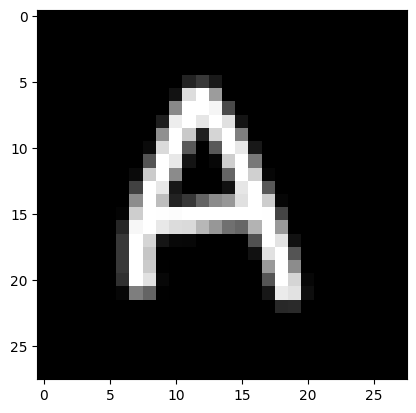

Predicted class: 4
True class: 43
4


In [44]:

def predict(testing):
  X_new = np.array(testing)
  activation1.forward(np.dot(X_new,layer1.weights)+layer1.baises)
  activation2.forward(np.dot(activation1.output,layer2.weights)+layer2.baises)
  prediction= np.argmax(activation2.output,axis=1)

  # prediction = predict(x_test_rand)

  print("Predicted class:", prediction[0])
  print("True class:", y_train[40002])

  mapping={}
  with open("/content/emnist-byclass-mapping.txt") as file:
      for line in file:
        label , ascie = line.strip().split()
        mapping[int(label)]= chr(int(ascie))
  print(mapping[prediction[0]])
# x_test_rand=X_train[40002]
# x_test_rand=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22745098039215686,0.23529411764705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00392156862745098,0.7843137254901961,0.8470588235294118,0.0392156862745098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20784313725490197,0.7647058823529411,0.7411764705882353,0.27450980392156865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6705882352941176,0.3803921568627451,0.34901960784313724,0.6627450980392157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23921568627450981,0.792156862745098,0.023529411764705882,0.0392156862745098,0.803921568627451,0.1411764705882353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00784313725490196,0.7215686274509804,0.3686274509803922,0.0,0.0,0.5411764705882353,0.5019607843137255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20392156862745098,0.792156862745098,0.0196078431372549,0.0,0.0,0.2,0.7686274509803922,0.01568627450980392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.47058823529411764,0.0,0.0,0.0,0.01568627450980392,0.7647058823529411,0.1843137254901961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10588235294117647,0.8196078431372549,0.09411764705882353,0.0,0.0,0.0,0.0,0.5568627450980392,0.4470588235294118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4196078431372549,0.5843137254901961,0.0,0.0,0.0,0.0,0.0,0.25882352941176473,0.7019607843137254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07058823529411765,0.7568627450980392,0.6039215686274509,0.34901960784313724,0.34509803921568627,0.2784313725490196,0.24705882352941178,0.1803921568627451,0.2196078431372549,0.8352941176470589,0.12156862745098039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2549019607843137,0.9098039215686274,0.5215686274509804,0.5254901960784314,0.5568627450980392,0.6078431372549019,0.6627450980392157,0.6666666666666666,0.7372549019607844,0.9137254901960784,0.34509803921568627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3803921568627451,0.615686274509804,0.0,0.0,0.0,0.0,0.0,0.0,0.00784313725490196,0.47058823529411764,0.5254901960784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6549019607843137,0.35294117647058826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25098039215686274,0.7176470588235294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06666666666666667,0.792156862745098,0.11764705882352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03137254901960784,0.788235294117647,0.1607843137254902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21176470588235294,0.7294117647058823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44313725490196076,0.6509803921568628,0.011764705882352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30196078431372547,0.6627450980392157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0196078431372549,0.8,0.1607843137254902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3607843137254902,0.6352941176470588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5568627450980392,0.47058823529411764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23529411764705882,0.3607843137254902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24313725490196078,0.5568627450980392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00392156862745098,0.01568627450980392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
x_test_rand=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13725490196078433,0.2196078431372549,0.09803921568627451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07058823529411765,0.8666666666666667,1.0,0.611764705882353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5372549019607843,1.0,1.0,0.9607843137254902,0.28627450980392155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11764705882352941,0.9294117647058824,1.0,0.9019607843137255,1.0,0.8784313725490196,0.0784313725490196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5647058823529412,1.0,0.788235294117647,0.12941176470588237,0.8352941176470589,1.0,0.4980392156862745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0392156862745098,0.8549019607843137,1.0,0.35294117647058826,0.0,0.35294117647058826,1.0,0.9098039215686274,0.09411764705882353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32941176470588235,1.0,0.9098039215686274,0.0784313725490196,0.0,0.027450980392156862,0.807843137254902,1.0,0.47058823529411764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0392156862745098,0.796078431372549,1.0,0.5450980392156862,0.0,0.0,0.0,0.396078431372549,1.0,0.8156862745098039,0.023529411764705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2549019607843137,1.0,0.9058823529411765,0.09019607843137255,0.0,0.0,0.0,0.06666666666666667,0.9019607843137255,1.0,0.34509803921568627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5529411764705883,1.0,0.7411764705882353,0.13333333333333333,0.21568627450980393,0.38823529411764707,0.5450980392156862,0.592156862745098,0.8784313725490196,1.0,0.803921568627451,0.023529411764705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01568627450980392,0.807843137254902,1.0,0.996078431372549,0.9882352941176471,1.0,1.0,1.0,1.0,1.0,1.0,0.996078431372549,0.26666666666666666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14901960784313725,0.9686274509803922,1.0,0.9098039215686274,0.8627450980392157,0.8549019607843137,0.7176470588235294,0.592156862745098,0.4392156862745098,0.4,0.7019607843137254,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2235294117647059,1.0,0.8352941176470589,0.08235294117647059,0.03137254901960784,0.027450980392156862,0.0,0.0,0.0,0.0,0.3176470588235294,1.0,0.8901960784313725,0.06666666666666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2196078431372549,1.0,0.7764705882352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06666666666666667,0.8823529411764706,1.0,0.32941176470588235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2235294117647059,1.0,0.796078431372549,0.00392156862745098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,1.0,0.5490196078431373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18823529411764706,1.0,0.8823529411764706,0.027450980392156862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3333333333333333,1.0,0.8352941176470589,0.027450980392156862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023529411764705882,0.49411764705882355,0.39215686274509803,0.00392156862745098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09019607843137255,0.9215686274509803,0.8862745098039215,0.054901960784313725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1607843137254902,0.16470588235294117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 ])


# For display
img_2d = x_test_rand.reshape(28, 28)

plt.imshow(img_2d, cmap='gray')
plt.show()
predict(x_test_rand)